In [1]:
import pandas as pd,warnings
warnings.filterwarnings('ignore')

# Step 01

In [2]:
df = pd.read_csv('data/weight-height.csv');df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [4]:
[0,1] in df.values

False

In [5]:
import matplotlib.pyplot as plt

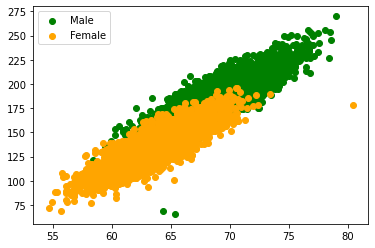

In [6]:
plt.scatter(df[ df.Gender=='Male']['Height'],df[ df.Gender=='Male']['Weight'],color='green',label='Male')
plt.scatter(df[ df.Gender=='Female']['Height'],df[ df.Gender=='Female']['Weight'],color='orange',label='Female')

plt.legend()

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
df.Gender = LabelEncoder().fit_transform(df.Gender);df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = df.drop('Weight',axis=1)
y = df.Weight

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.70,random_state=1)

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression().fit(xtrain,ytrain)

In [14]:
lr.score(xtest,ytest)

0.905995960709116

In [15]:
lr.predict(xtest)

array([143.83013436, 197.53417989, 184.63515112, ..., 160.7078525 ,
       186.82852694, 201.4226542 ])

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mean_squared_error(ytest,lr.predict(xtest))

99.67250998070031

# KNeighbors Regressor

In [18]:
from sklearn.neighbors import KNeighborsRegressor

In [19]:
reg = KNeighborsRegressor().fit(xtrain,ytrain)

In [20]:
reg.score(xtest,ytest)

0.8838502073708883

In [21]:
mean_squared_error(ytest,reg.predict(xtest))

123.15365863436983

In [22]:
kn=reg.predict(xtest)

# Tuning 

# Randomized Search

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
import numpy as np

In [27]:
grids = {
    'n_neighbors':[int(x) for x in np.linspace(10,200,20)],
    'weights':['uniform','distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'] 
}

In [28]:
rmcv = RandomizedSearchCV(KNeighborsRegressor(),param_distributions=grids,n_iter=100, cv=5, n_jobs=5)
%time rmcv.fit(xtrain,ytrain)

Wall time: 10.4 s


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=100, n_jobs=5,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [10, 20, 30, 40, 50, 60,
                                                        70, 80, 90, 100, 110,
                                                        120, 130, 140, 150, 160,
                                                        170, 180, 190, 200],
                                        'weights': ['uniform', 'distance']})

In [29]:
rmcv.best_params_

{'weights': 'uniform', 'n_neighbors': 50, 'algorithm': 'brute'}

In [30]:
pd.DataFrame(rmcv.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005784,0.003117,0.008377,0.003313,uniform,20,kd_tree,"{'weights': 'uniform', 'n_neighbors': 20, 'alg...",0.888651,0.893103,0.888252,0.889155,0.897280,0.891288,0.003462,24
1,0.008776,0.003362,0.039095,0.005549,distance,160,auto,"{'weights': 'distance', 'n_neighbors': 160, 'a...",0.876656,0.878790,0.878416,0.879256,0.890279,0.880679,0.004880,58
2,0.006382,0.003489,0.044681,0.010914,distance,50,ball_tree,"{'weights': 'distance', 'n_neighbors': 50, 'al...",0.873434,0.876725,0.876445,0.876587,0.886789,0.877996,0.004564,83
3,0.003989,0.000891,0.045678,0.002918,distance,80,ball_tree,"{'weights': 'distance', 'n_neighbors': 80, 'al...",0.875313,0.877946,0.877416,0.878091,0.888438,0.879441,0.004607,77
4,0.002394,0.000489,0.288429,0.039851,distance,40,brute,"{'weights': 'distance', 'n_neighbors': 40, 'al...",0.872384,0.875740,0.875696,0.875955,0.885807,0.877116,0.004543,90


In [31]:
rmcv.best_score_

0.893419236196773

In [32]:
rmcv.best_estimator_.score(xtest,ytest)

0.9035931970477211

# Step-02

In [39]:
x = df.drop('Gender',axis=1)
y = df.Gender

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70,random_state=1)

# KNeighborsClassifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
kn_clf = KNeighborsClassifier().fit(xtrain,ytrain)

In [43]:
kn_clf.score(xtest,ytest)

0.9146864043630697

In [44]:
kn_clf.predict(xtest)

array([1, 1, 1, ..., 0, 1, 1])

In [45]:
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,plot_roc_curve

In [46]:
confusion_matrix(ytest,kn_clf.predict(xtest))

array([[ 938,  117],
       [ 102, 1410]], dtype=int64)

In [47]:
print(classification_report(ytest,kn_clf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1055
           1       0.92      0.93      0.93      1512

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



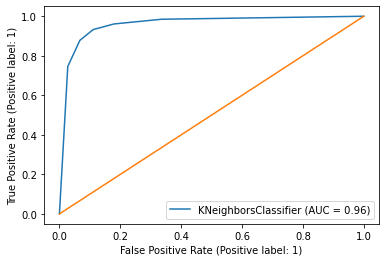

In [48]:
plot_roc_curve(kn_clf,xtest,ytest)
plt.plot([0,1])

In [49]:
roc_auc_score(kn_clf.predict(xtest),ytest)

0.9126511258878646

# Tuning

# Randomized Search CV

In [50]:
rmcv2 = RandomizedSearchCV(KNeighborsClassifier(), grids, n_iter=200, cv=5,verbose=2,n_jobs=5)
rmcv2.fit(xtrain,ytrain)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=200, n_jobs=5,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [10, 20, 30, 40, 50, 60,
                                                        70, 80, 90, 100, 110,
                                                        120, 130, 140, 150, 160,
                                                        170, 180, 190, 200],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [51]:
rmcv2.best_params_

{'weights': 'distance', 'n_neighbors': 60, 'algorithm': 'auto'}

In [52]:
pd.DataFrame(rmcv2.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003388,0.000486,0.029122,0.001163,uniform,10,auto,"{'weights': 'uniform', 'n_neighbors': 10, 'alg...",0.904841,0.910684,0.907346,0.906433,0.923977,0.910656,0.006929,129
1,0.003391,0.000489,0.005186,0.000977,distance,10,auto,"{'weights': 'distance', 'n_neighbors': 10, 'al...",0.886477,0.908180,0.902337,0.915622,0.916458,0.905815,0.010964,157
2,0.003391,0.000489,0.030918,0.001784,uniform,20,auto,"{'weights': 'uniform', 'n_neighbors': 20, 'alg...",0.903172,0.911519,0.918197,0.907268,0.925647,0.913161,0.007981,21
3,0.003390,0.000488,0.006782,0.000399,distance,20,auto,"{'weights': 'distance', 'n_neighbors': 20, 'al...",0.898998,0.908180,0.908180,0.912281,0.924812,0.910490,0.008379,133
4,0.004188,0.000977,0.032513,0.001197,uniform,30,auto,"{'weights': 'uniform', 'n_neighbors': 30, 'alg...",0.902337,0.913189,0.917362,0.903926,0.925647,0.912492,0.008646,49


In [53]:
rmcv2.best_score_

0.9139965941565098

In [54]:
rmcv2.best_estimator_.score(xtest,ytest)

0.9228671601090768